<a href="https://colab.research.google.com/github/Ramudgar/PlantDiseaseDetection-Rice-/blob/master/EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
import os
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
# from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator( rotation_range=40,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,preprocessing_function=preprocess_input)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train=train_datagen.flow_from_directory(
        "/content/drive/MyDrive/thesis/riceplantdisease_project/Train",  # directory with training data
        target_size=(256, 256),  # resize images to 256x256
        batch_size=32)

val=val_datagen.flow_from_directory(
        "/content/drive/MyDrive/thesis/riceplantdisease_project/Validatoin",  # directory with training data
        target_size=(256, 256),  # resize images to 256x256
        batch_size=32) 
test=val_datagen.flow_from_directory(
        "/content/drive/MyDrive/thesis/riceplantdisease_project/Test",  # directory with training data
        target_size=(256, 256),  # resize images to 256x256
        batch_size=32)


Found 6051 images belonging to 7 classes.
Found 1854 images belonging to 7 classes.
Found 1039 images belonging to 7 classes.


In [ ]:
# Building Model
import tensorflow
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.efficientnet_v2 import EfficientNetV2B2
import keras


In [ ]:
base_model=EfficientNetV2B2(weights='imagenet',input_shape=(256,256,3),include_top=False)

35839040/35839040 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 32  864         ['normalization[0

In [ ]:

X=Flatten()(base_model.output)
X = Dropout(0.2)(X)
X=Dense(units=7,activation="softmax" )(X)

# creating model

model=Model(base_model.input,X)

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 32  864         ['normalization[0][0]']      

In [ ]:
model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#early stopping 
es= EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1)

#Model checkpoint
mc=ModelCheckpoint(filepath="efficient_model.h5",monitor="val_accuracy",
                   min_delta=0.01,
                   patience=3,verbose=1,
                   save_best_only=True)
cb=[es,mc]

In [ ]:
his=model.fit(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.0670 - accuracy: 0.8809
Epoch 1: val_accuracy did not improve from 0.91992
16/16 [==============================] - 155s 10s/step - loss: 1.0670 - accuracy: 0.8809 - val_loss: 1.2268 - val_accuracy: 0.8418
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.1234 - accuracy: 0.8691
Epoch 2: val_accuracy did not improve from 0.91992
16/16 [==============================] - 145s 9s/step - loss: 1.1234 - accuracy: 0.8691 - val_loss: 0.3530 - val_accuracy: 0.9141
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.7205 - accuracy: 0.8965
Epoch 3: val_accuracy did not improve from 0.91992
16/16 [==============================] - 154s 10s/step - loss: 0.7205 - accuracy: 0.8965 - val_loss: 0.8642 - val_accuracy: 0.8828
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.0111 - accuracy: 0.8809
Epoch 4: val_accuracy did not improve from 0.91992
16/16 [=====================

In [ ]:
#load best model

from keras.models import load_model
model=load_model('/content/efficient_model.h5')

In [ ]:
#Evaluate model
acc=model.evaluate(test)[1]
print(f"the accuracy of your model is ={acc*100}%")

33/33 [==============================] - 166s 5s/step - loss: 0.8888 - accuracy: 0.8884
the accuracy of your model is =88.83541822433472%


In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

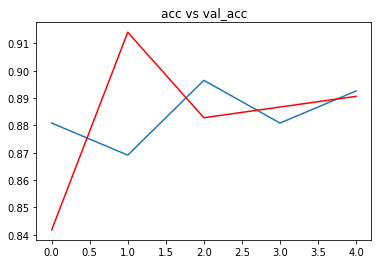

In [ ]:
# plotting value of accuracy vs validation accuracy
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],c="red")
plt.title("acc vs val_acc")
plt.show()

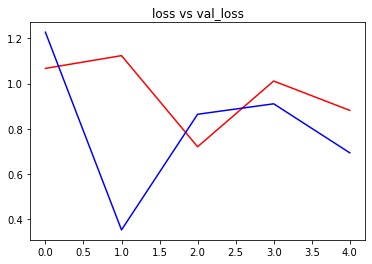

In [ ]:
# plotting value of loss vs validation loss
plt.plot(h["loss"],c='red')
plt.plot(h["val_loss"],c="blue")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
from keras_preprocessing.image.utils import load_img
# prediction
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f"The disease detected is {ref[pred]}")

In [ ]:
path="/content/drive/MyDrive/thesis/riceplantdisease_project/Test/BROWNSPOT/BROWNSPOT1_006.jpg"
prediction(path)

1/1 [==============================] - 3s 3s/step
The disease detected is BROWNSPOT
